<a href="https://colab.research.google.com/github/JadhavRaaj/machine-learning-notes/blob/main/handling_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handling missing data**

---
missing completely at random is a type of missing data mechanism in which the probability of value being missing is unrelated to both the observed data and msissing data.
missing at random is a type of mechanism in which the probability of missing dat is dependent only on the observed data.
missing not at random is the mechanism in which the probability of missing data is dependent only on the missing data values itself.


In [ ]:
import seaborn as sns

In [ ]:
df= sns.load_dataset('titanic')

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#check missing values
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
#describe the rows or data points to handle missing values

df.shape

(891, 15)

**Imputation techniques**

---
techniques with the help of which we handle missing values

**1) mean imputation technique**

<Axes: xlabel='age', ylabel='Count'>

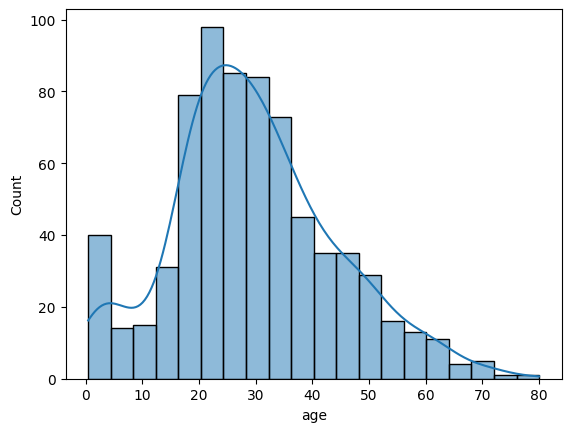

In [ ]:
#mean value imputation technique is useful when we have normally distributed data

sns.histplot(df['age'],kde=True)

In [ ]:
df['Age_median']= df['age'].fillna(df['age'].mean())

In [ ]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_median
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,29.699118
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,54.000000
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,2.000000
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,27.000000
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,14.000000


In [ ]:
df.drop('Age_median',axis=1,inplace=True)

**2) Median value imputation technique**

In [ ]:
# this technique is useful when we have outliers in the data

df['age'].median()
#you can see the difference between in the median and mean value below

28.0

In [ ]:
df['age'].mean()

29.69911764705882

**3) mode imputation technique**

In [ ]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [ ]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df['new_embarked']=df['embarked'].fillna(df['embarked'].mode())

In [ ]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


# **Handling imbalanced dataset**

---
1) Up sampling
2) down sampling


**Upsampling**

In [ ]:


import numpy as np
import pandas as pd

#set random seed for reproducibility
np.random.seed(123)

#create a dataframe with two classes
n_samples= 1000
class_0_ratio= 0.9
n_class_0= int(n_samples * class_0_ratio)
n_class_1= n_samples - n_class_0

In [ ]:
n_class_0,n_class_1

(900, 100)

In [ ]:
class_0= pd.DataFrame({
    'feature_1': np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2': np.random.normal(loc=0,scale=1,size=n_class_0),
    'target': [0] * n_class_0
})
class_1= pd.DataFrame({
    'feature_1': np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_2': np.random.normal(loc=2,scale=1,size=n_class_1),
    'target': [1] * n_class_1
})

In [ ]:
new_df = pd.concat([class_0,class_1]).reset_index(drop=True)

In [ ]:
new_df.head(10)

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
5,1.651437,-0.116932,0
6,-2.426679,-0.102391,0
7,-0.428913,-2.272618,0
8,1.265936,-0.642610,0
9,-0.866740,0.299885,0


In [ ]:
new_df['target'].value_counts()

,count
target,
0,900
1,100


In [ ]:
new_df_minority= new_df[new_df['target']==1]
new_df_majority= new_df[new_df['target']==0]

In [ ]:
from sklearn.utils import resample
new_df_minority_upsampled=resample(new_df_minority,replace=True, n_samples=len(new_df_majority),random_state=42)

In [ ]:
new_df_minority_upsampled.shape

(900, 3)

In [ ]:
new_df_upsampled= pd.concat([new_df_majority,new_df_minority_upsampled])

In [ ]:
new_df_upsampled['target'].value_counts()

,count
target,
0,900
1,900


**Down Sampling**

In [ ]:

import numpy as np
import pandas as pd

#set random seed for reproducibility
np.random.seed(123)

#create a dataframe with two classes
n_samples= 1000
class_0_ratio= 0.9
n_class_0= int(n_samples * class_0_ratio)
n_class_1= n_samples - n_class_0

In [ ]:
n_class_0,n_class_1

In [ ]:
class_0= pd.DataFrame({
    'feature_1': np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2': np.random.normal(loc=0,scale=1,size=n_class_0),
    'target': [0] * n_class_0
})
class_1= pd.DataFrame({
    'feature_1': np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_2': np.random.normal(loc=2,scale=1,size=n_class_1),
    'target': [1] * n_class_1
})

In [ ]:
new_df = pd.concat([class_0,class_1]).reset_index(drop=True)

In [ ]:
new_df.head(10)

# **SMOTE**

---
SMOTE basically means synthetic minority oversampling technique used machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. smote involves generating synthetic instances of minority class by interpolating between existing instances.


In [ ]:
from sklearn.datasets import make_classification

In [ ]:
x,y = make_classification(n_samples=1000,n_features=2,n_redundant=0,n_clusters_per_class=1,weights=[0.90],random_state=12)

In [ ]:
import pandas as pd
df1 = pd.DataFrame(x,columns=['feature_1','feature_2'])
df2 = pd.DataFrame(y,columns=['target'])
final_df = pd.concat([df1,df2],axis=1)
final_df.head()

,feature_1,feature_2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


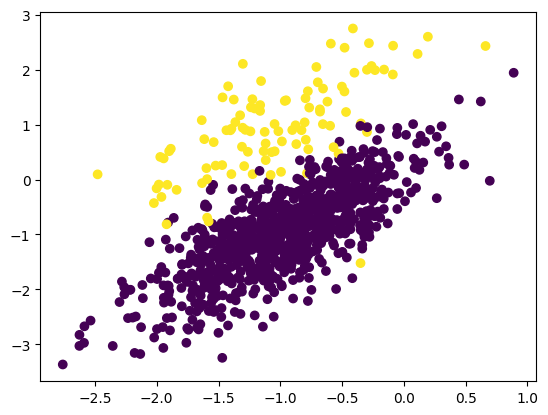

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=final_df['feature_1'],y=final_df['feature_2'],c=final_df['target'])
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE()
x,y = oversample.fit_resample(final_df[['feature_1','feature_2']],final_df['target'])

In [ ]:
x.shape

(1800, 2)

In [ ]:
y.shape

(1800,)

In [ ]:
df1 = pd.DataFrame(x,columns=['feature_1','feature_2'])
df2 = pd.DataFrame(y,columns=['target'])
oversample_df = pd.concat([df1,df2],axis=1)
oversample_df.head()

,feature_1,feature_2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


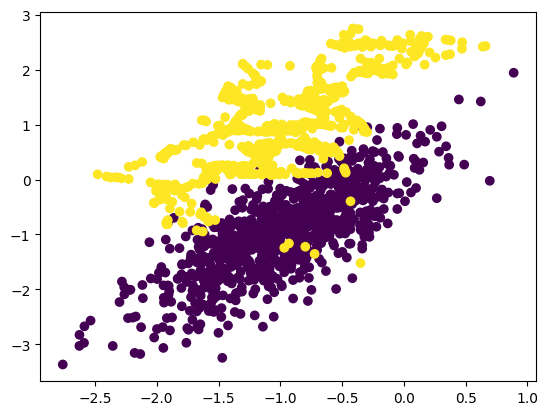

In [ ]:
plt.scatter(x=oversample_df['feature_1'],y=oversample_df['feature_2'],c=oversample_df['target'])
plt.show()

# **Handling Outliers**

---



In [ ]:
import numpy as np

In [ ]:
list_marks = [45,55,78,65,80,95,56,68,89,92]
minimum,q1,median,q3,maximum=np.quantile(list_marks,[0,0.25,0.50,0.75,1.0])

In [ ]:
minimum,q1,median,q3,maximum

(45.0, 58.25, 73.0, 86.75, 95.0)

In [ ]:
IQR = q3-q1
print(IQR)

28.5


In [ ]:
lower_fence = q1 - 1.5 * IQR
upper_fence = q3 + 1.5 * IQR

In [ ]:
lower_fence, upper_fence

(15.5, 129.5)

<Axes: >

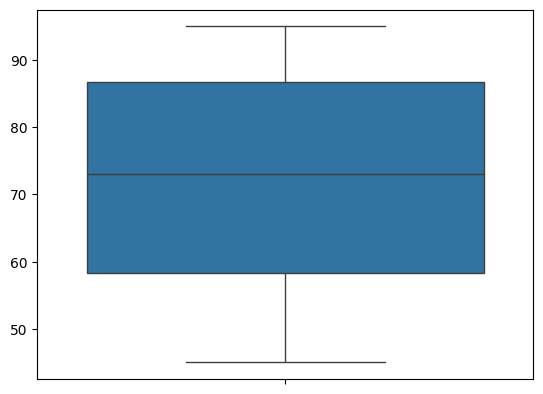

In [ ]:
import seaborn as sns
sns.boxplot(list_marks,)

# **Data Encoding**

---



# **Nominal / OHE encoding**

---
one hot encoding also known as nominal encoding, is a technique used to represent categorical data as numerical data which is more suitable for machine learning algorithms. in this technique each category is represented as a binary vector where each bit corresponds to a unique category. for example, if we have a categorical variable 'color' with three possible values (red, green, blue) we can represent it as one hot encoding as follows.

Red = [1,0,0]

blue = [0,1,0]

green = [0,0,1]

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#create simple dataframe
df =pd.DataFrame({
    'color' : ['red','blue','green','green','red','blue']
})

In [ ]:
df.head()

,color
0,red
1,blue
2,green
3,green
4,red


In [ ]:
#create an instance of onehotencoder
encoder = OneHotEncoder()

In [ ]:
#perform fit and transform
encoded= encoder.fit_transform(df[['color']]).toarray()

In [ ]:
import pandas as pd
encoder_df = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

In [ ]:
encoder_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0


In [ ]:
pd.concat([df,encoder_df],axis=1)

,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,green,0.0,1.0,0.0
4,red,0.0,0.0,1.0
5,blue,1.0,0.0,0.0


# **Label Encoding**

---

simple numeric values are assigned

red = 1

blue = 2

green = 3

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()

In [ ]:
encoded_lbl= lbl_encoder.fit_transform(df[['color']])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
encoder_lbl = pd.DataFrame(encoded_lbl,columns=['lbl_encoded'])

In [ ]:
pd.concat([df,encoder_lbl],axis=1)

,color,lbl_encoded
0,red,2
1,blue,0
2,green,1
3,green,1
4,red,2
5,blue,0
